In [2]:
import json
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%load_ext autoreload

%autoreload 2


In [3]:
import profiler
import single_model_profiles as sm_profs

In [4]:
profs = sm_profs.load_single_model_profiles()

In [ ]:
profs.keys()

In [ ]:
aws_profs = res_prof[(res_prof.cloud == "aws")].sort_values("mean_batch_size")
aws_profs

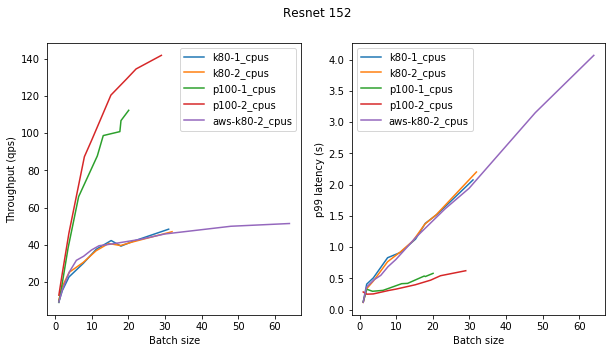

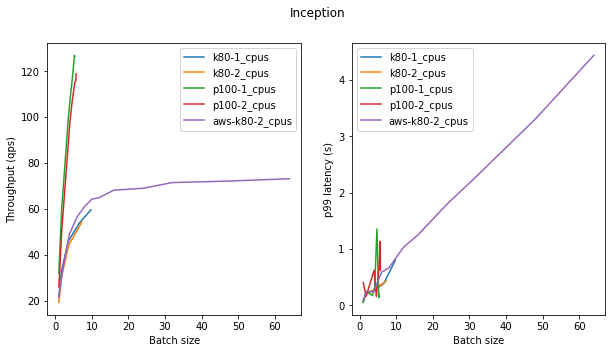

In [7]:
profs = sm_profs.load_single_model_profiles()
def plot_smp_thrus(prof, title, plot_gcp=False):
    # GCP
    plt.clf()
    fig, (ax_thru, ax_lat) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    
    dfs = []
    if plot_gcp:
        gcp_profs = prof[(prof.cloud == "gcp")]
        for gpu in ["k80", "p100"]:
            for num_cpus in [1,2]:
                df = gcp_profs[(gcp_profs.gpu_type == gpu)
                             & (gcp_profs.num_cpus_per_replica == num_cpus)]
                df = df.sort_values("mean_batch_size")
                ax_thru.plot(df["mean_batch_size"], df["mean_throughput_qps"], label="{gpu}-{cpu}_cpus".format(gpu=gpu, cpu=num_cpus))
                ax_lat.plot(df["mean_batch_size"], df["p99_latency"], label="{gpu}-{cpu}_cpus".format(gpu=gpu, cpu=num_cpus))

                dfs.append(df)
    aws_profs = prof[(prof.cloud == "aws")]
    df = aws_profs.sort_values("mean_batch_size")
    ax_thru.plot(df["mean_batch_size"], df["mean_throughput_qps"], label="aws-k80-2_cpus".format(gpu=gpu, cpu=num_cpus))
    ax_lat.plot(df["mean_batch_size"], df["p99_latency"], label="aws-k80-2_cpus".format(gpu=gpu, cpu=num_cpus))
    
    ax_thru.set_xlabel("Batch size")
    ax_thru.set_ylabel("Throughput (qps)")
    ax_thru.legend(loc=0)
    ax_lat.set_xlabel("Batch size")
    ax_lat.set_ylabel("p99 latency (s)")
    ax_lat.legend(loc=0)
    fig.suptitle(title)
    plt.show()
    return dfs
            
plot_smp_thrus(profs["tf-resnet-feats"], "Resnet 152", plot_gcp=True)
incept_dfs = plot_smp_thrus(profs["inception"], "Inception", plot_gcp=True)

# gcp_results = res_prof[(res_prof.cloud == "gcp") & ()]
# gcp_results

In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
for d in incept_dfs:
    display(d)

In [ ]:
def load_results(results_dir):
    fs = os.listdir(results_dir)
    experiments = []
    for exp in fs:
        if exp[-4:] == "json":
            with open(os.path.join(results_dir, exp), "r") as f:
                data = json.load(f)
                experiments.append(data)
        else:
            # print("skipping %s" % os.path.join(results_dir, exp))
            pass
    return experiments

In [ ]:
var_size_results = load_results(
    os.path.abspath("../results/single_model_profs_old/kernel-svm-var-size/"))


mname, df = sm_profs.create_model_profile_df(None, var_size_results)




In [ ]:
df

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
x = np.random.rand(1,4096)
X = np.random.rand(10000,4096)
%timeit k = rbf_kernel(X,x)

In [ ]:
k.dot(x)